
**`CAR PRICE PREDICTION`**

In [ ]:
# import numpy and pandas
import numpy as np
import pandas as pd

# Use the raw file URL for pd.read_csv
data = "https://raw.githubusercontent.com/SUKHMAN-SINGH-1612/Data-Science-Projects/main/Belarus%20Car%20Price%20Prediction/cars.csv"
df = pd.read_csv(data)
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


**DATA UNDERSTANDING AND CLEANING**

In [ ]:
df.shape

(56244, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


In [ ]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [ ]:
#check columns with null values
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

In [ ]:
#check unique values in columns
df.nunique()

make                     96
model                  1034
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

In [ ]:

#drop segment and model columns (they are irrelevant in the prediction)
columns_to_drop = ['segment', 'model']
df.drop(columns = columns_to_drop, inplace = True)


In [ ]:
#Get unique car makes
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

In [ ]:

#categorize cars based on their make and region of manufacture
European_sport = ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']
European = ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]
Eastern_european = ['gaz', 'aro', 'lada-vaz','lancia,' 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']
Asian = ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']
American = ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']
Luxury_sport = ['porsche','bentley', 'maserati', 'tesla', 'mclaren']

In [ ]:
categories = {
    'European_sport': ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover'],
    'European' : ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ],
    'Eastern_european' : ['gaz', 'aro', 'lancia','lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']
,'Asian' : ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']
,'American': ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']
,'Luxury_sport': ['porsche','bentley', 'maserati', 'tesla', 'mclaren']
 }

# Create a separate DataFrame for the categories
categories_data = []
for category, cars in categories.items():
    for car in cars:
        categories_data.append({'make': car, 'category': category})

categories_df = pd.DataFrame(categories_data)

new_df = pd.merge(df, categories_df, on='make', how='left')
new_df

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,category
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,European_sport
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,European_sport
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,European_sport
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,European_sport
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,European_sport
...,...,...,...,...,...,...,...,...,...,...,...
58769,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Eastern_european
58770,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Eastern_european
58771,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Eastern_european
58772,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Eastern_european


In [ ]:
counts= new_df['category'].value_counts()
counts

category
European            22319
European_sport      14404
Asian               11269
American             4661
Eastern_european     1651
Luxury_sport          206
Name: count, dtype: int64

**EXPLORATORY ANALYSIS**

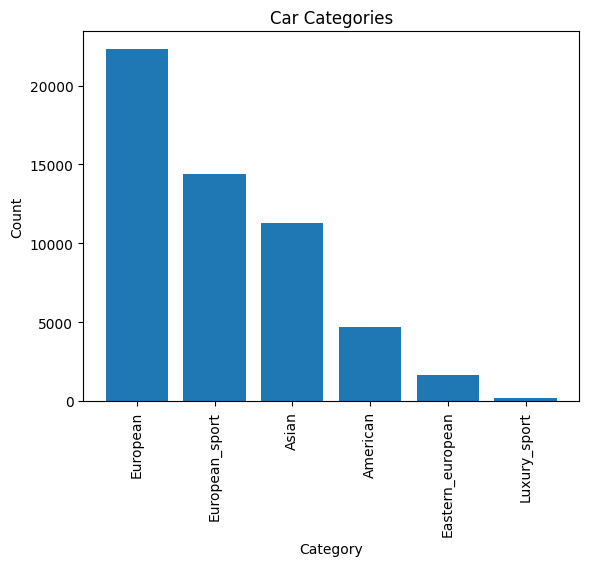

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# a barplot to understand car segments/categories
# Create the bar plot
plt.bar(x=counts.index, height=counts.values)
# Set the labels and title
plt.xticks(rotation=90)
plt.title('Car Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

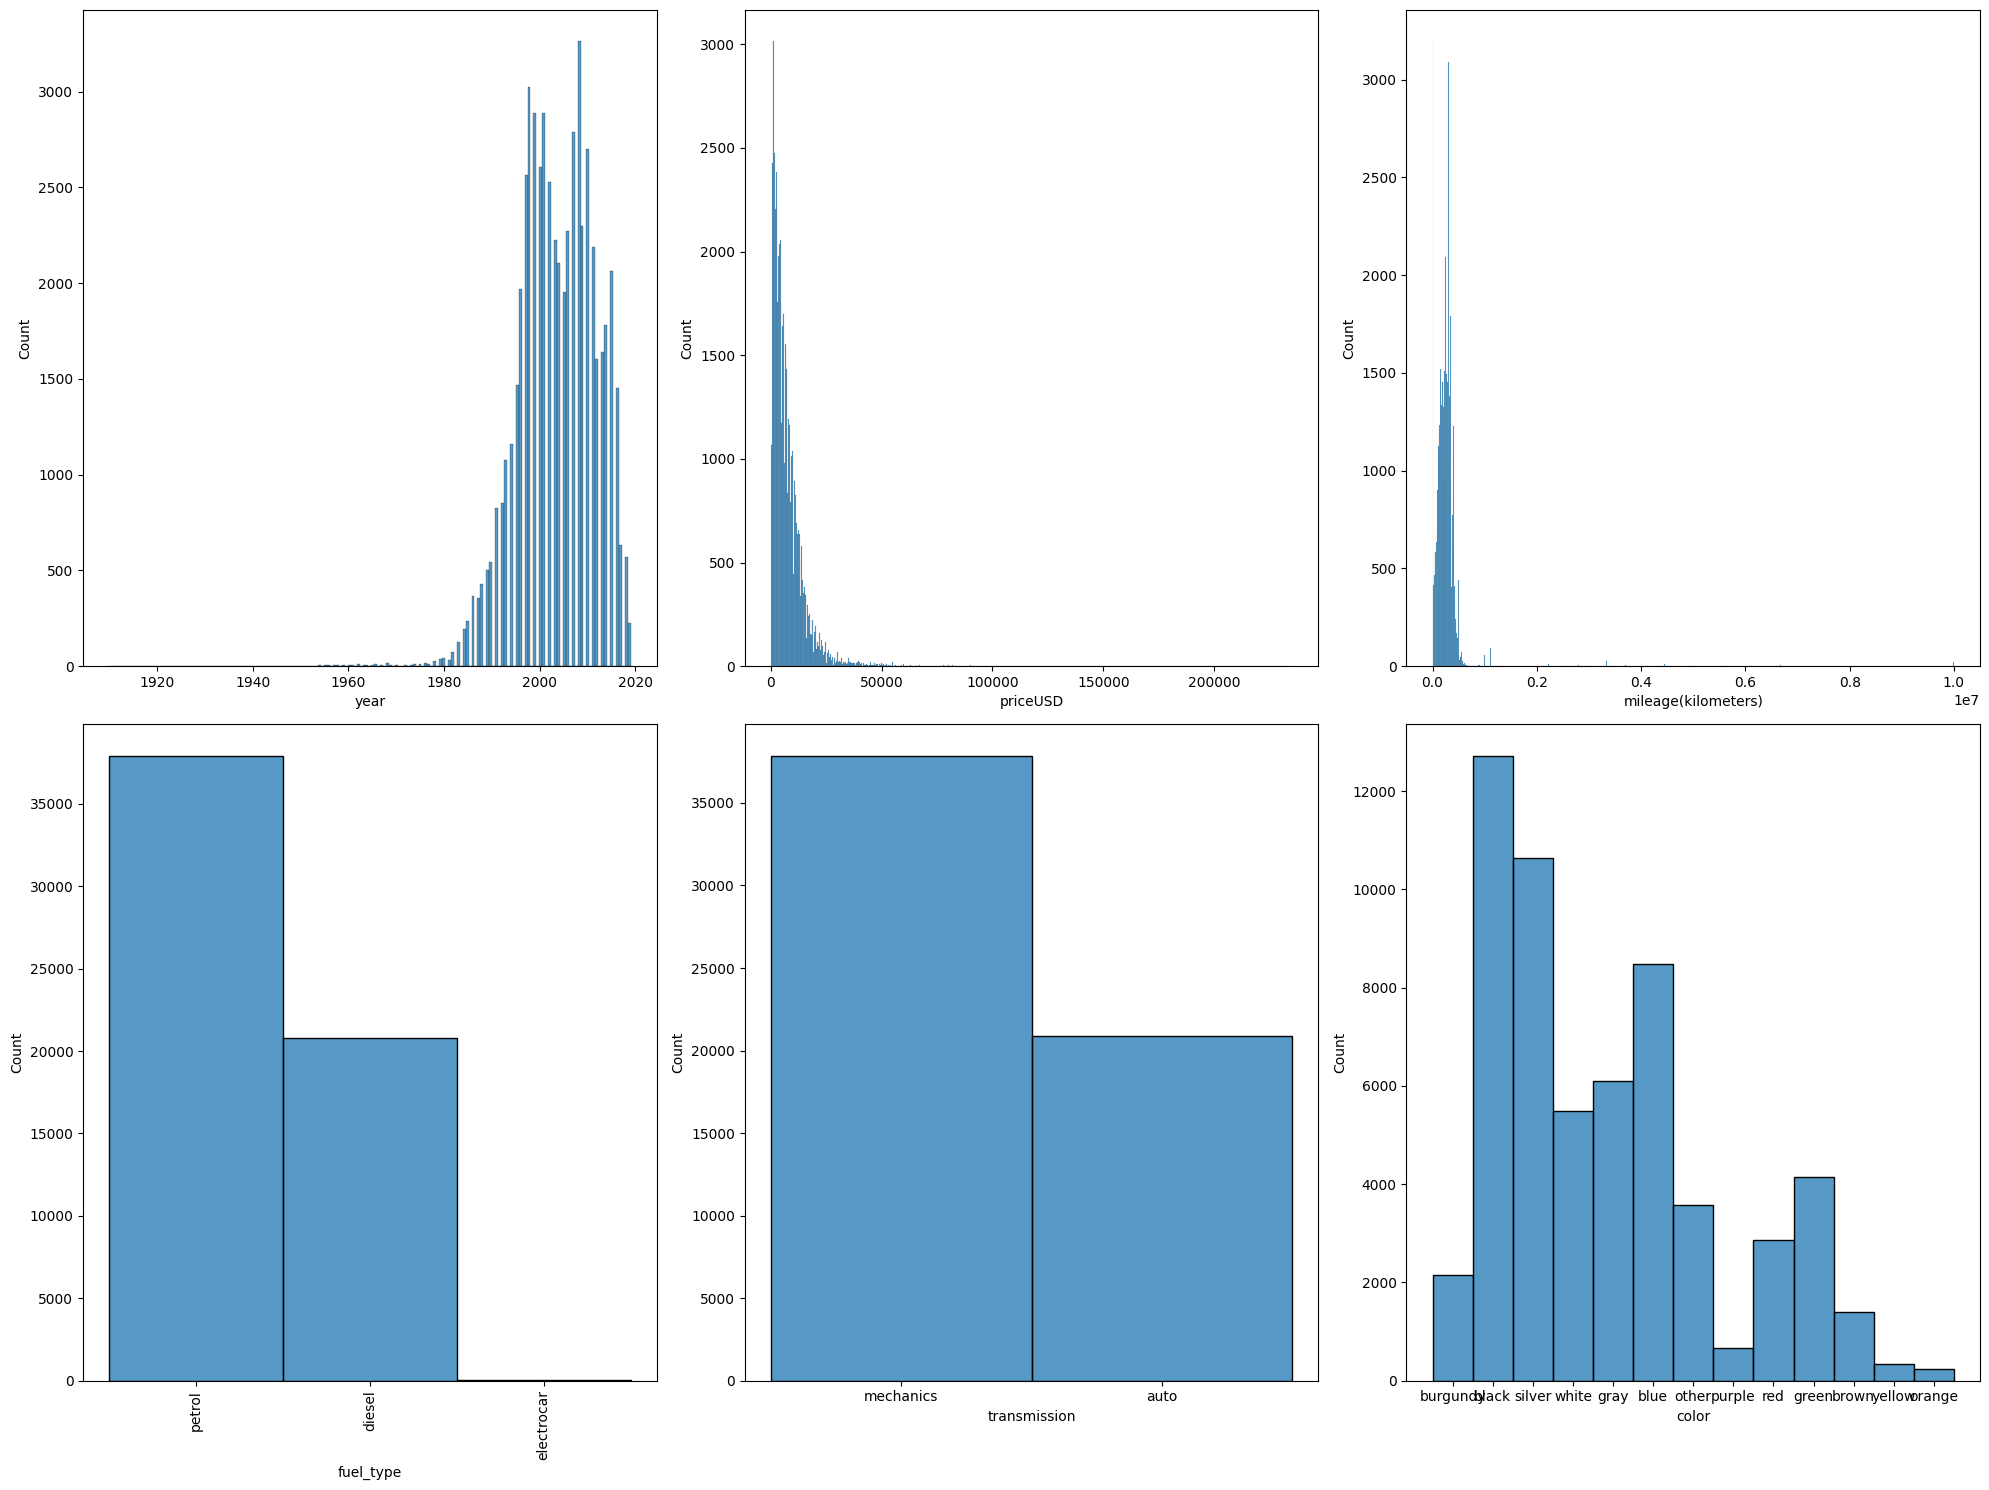

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
sns.histplot(x='year', data=new_df, ax=ax[0, 0])
sns.histplot(x='priceUSD', data=new_df, ax=ax[0, 1])
sns.histplot(x='mileage(kilometers)', data=new_df, ax=ax[0, 2])
sns.histplot(x='fuel_type', data=new_df, ax=ax[1, 0])
sns.histplot(x='transmission', data=new_df, ax=ax[1, 1])
sns.histplot(x='color', data=new_df, ax=ax[1, 2])
ax[1,0].tick_params(axis= 'x', rotation=90)
plt.tight_layout()
plt.show()

CONTINIOUS VARIABLES

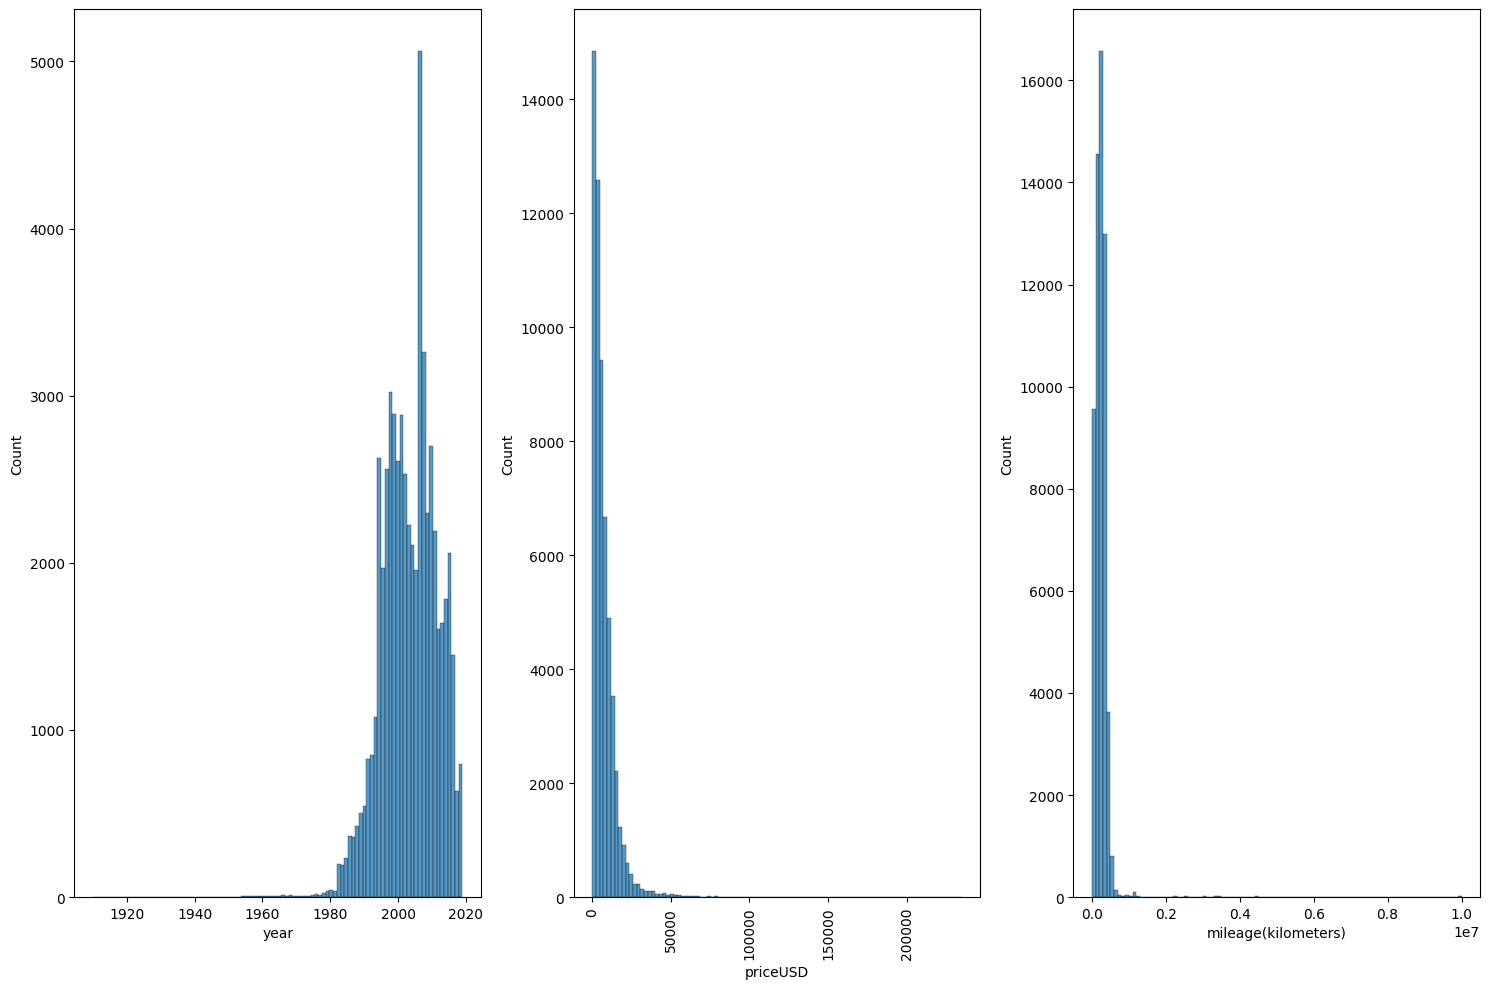

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
sns.histplot(x='year', data=new_df, bins=100, ax=ax[0])
sns.histplot(x='priceUSD', data=new_df, bins=100, ax=ax[1])
sns.histplot(x='mileage(kilometers)', data=new_df, bins=100, ax=ax[2])
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()



 Most vehicles were manufactured between Year 1980 to 2015.
Most vehicles have a price range of 0 to 50,000 USD.

Most vehicles have a mileage of 1 million Kilometers(km)


In [ ]:

#Vehicles manufactured from 1980
latest_man_df = new_df[new_df['year'] >= 1980]
latest_man_df

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,category
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,European_sport
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,European_sport
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,European_sport
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,European_sport
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,European_sport
...,...,...,...,...,...,...,...,...,...,...,...
58769,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Eastern_european
58770,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Eastern_european
58771,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Eastern_european
58772,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Eastern_european


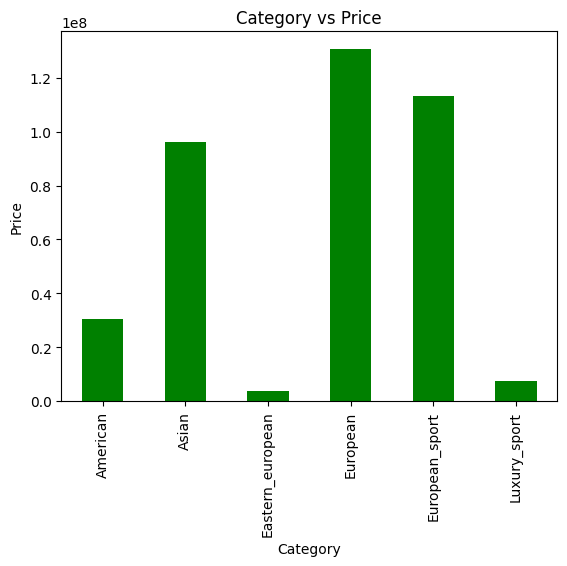

In [ ]:
#Group by make and price

category_Price =latest_man_df.groupby('category')['priceUSD'].sum()
category_Price.plot(kind='bar', color = 'green')
plt.title('Category vs Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

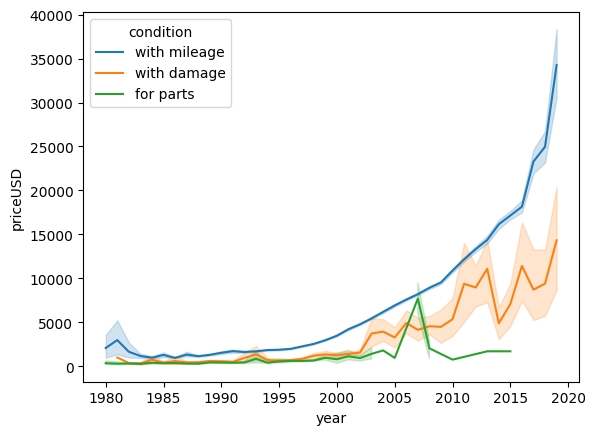

In [ ]:
#price  and condition
sns.lineplot(x='year', y='priceUSD', data= latest_man_df, hue='condition')
plt.show()

PRICE AND FUEL TYPE


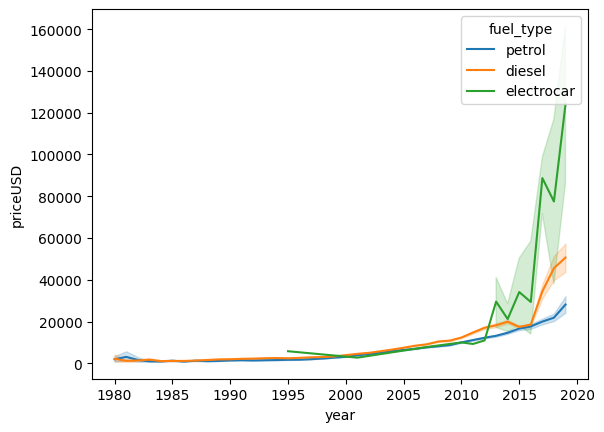

In [ ]:
sns.lineplot(x='year', y='priceUSD', data=latest_man_df, hue='fuel_type')
plt.show()

PRICE AND DRIVE UNIT

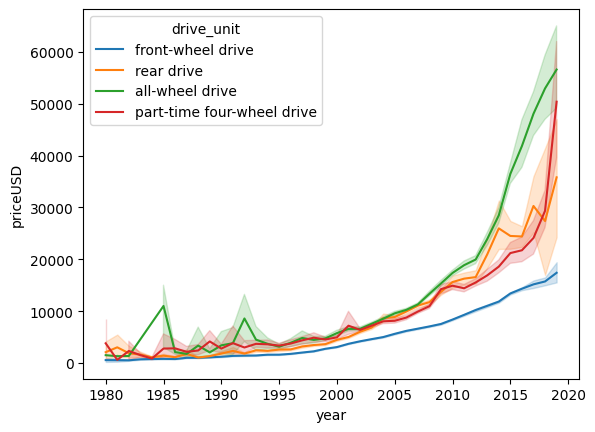

In [ ]:
sns.lineplot(x='year', y='priceUSD', data=latest_man_df, hue= 'drive_unit')
plt.show()

PRICE AND BRAND

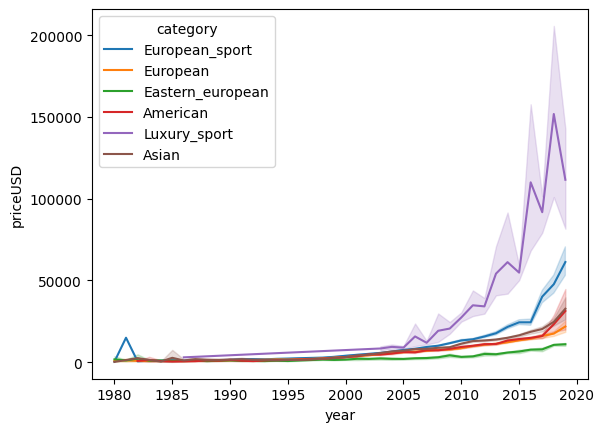

In [ ]:
sns.lineplot(x='year', y='priceUSD', data=latest_man_df, hue='category')
plt.show()

PRICE AND TRANSMISSION

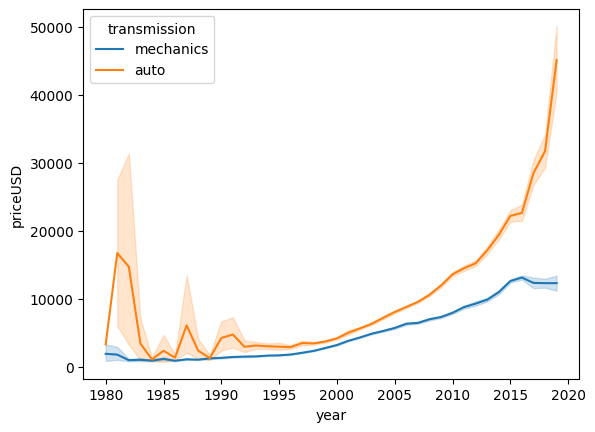

In [ ]:

sns.lineplot(x='year', y='priceUSD', data= latest_man_df, hue = 'transmission')
plt.show()

**DATA PREPROCESSING**


---



In [ ]:
#rename dataframe and make the name shorter
df = latest_man_df
#check null values in columns
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1983
category               4232
dtype: int64

In [ ]:
#drop null values/rows
df.dropna(inplace=True)


<ipython-input-84-aa064023f1c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.drop(columns = ['make'], inplace= True)

<ipython-input-85-0a59dd90534c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['make'], inplace= True)


LABEL ENCODING OF OBJECT DATA TYPE TO INTEGERS

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['category', 'fuel_type','color', 'drive_unit', 'transmission', 'condition']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

<ipython-input-86-5cf98a9eed36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-86-5cf98a9eed36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-86-5cf98a9eed36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,category
0,5500,2008,2,162000.0,1,1500.0,3,1,1,4
1,5350,2009,2,120000.0,1,1300.0,0,1,1,4
2,7000,2009,2,61000.0,1,1500.0,10,0,1,4
3,3300,2003,2,265000.0,0,1400.0,11,1,1,4
4,5200,2008,2,97183.0,0,1400.0,4,1,1,4


**CORRELATION HEAT MAP**

<Axes: >

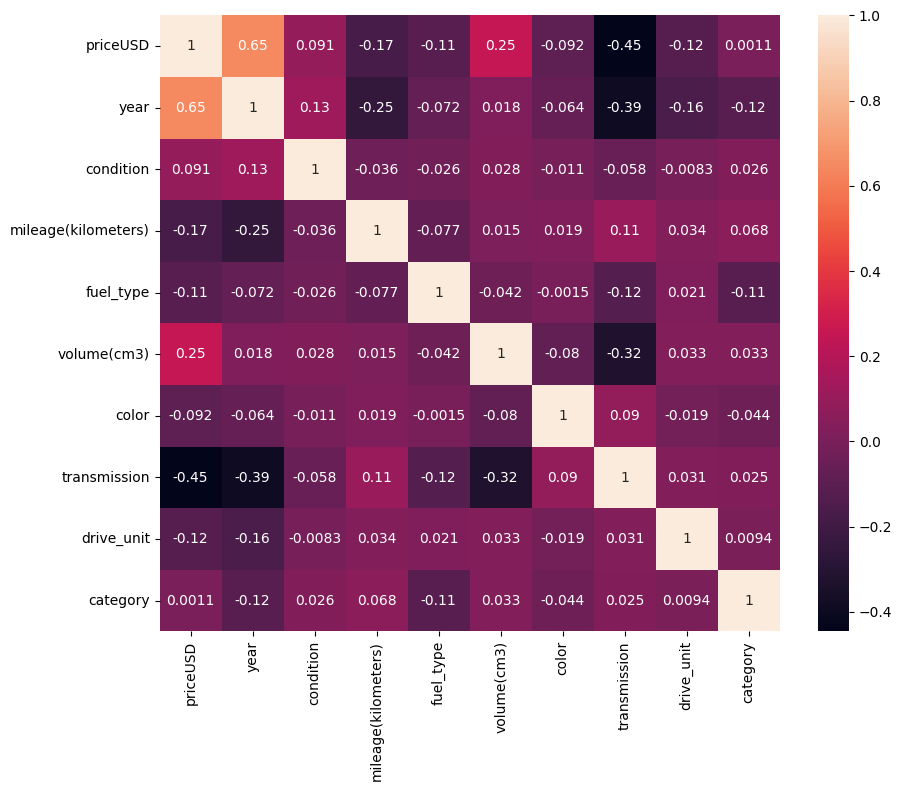

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#find the correlation in the dataset
correlation = df.corr()

#plot a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True)

REMOVE OUTLIERS

In [ ]:
#method 1(quantile) for outlier removal

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df= df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]



In [ ]:
#method 2 (Z-scores) for outlier removal
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
df = df[(z < threshold).all(axis=1)]
df


,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,category
0,5500,2008,2,162000.0,1,1500.0,3,1,1,4
1,5350,2009,2,120000.0,1,1300.0,0,1,1,4
2,7000,2009,2,61000.0,1,1500.0,10,0,1,4
3,3300,2003,2,265000.0,0,1400.0,11,1,1,4
4,5200,2008,2,97183.0,0,1400.0,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...
58769,3650,2000,2,290000.0,1,2000.0,7,1,1,2
58770,4100,1999,2,340000.0,0,2100.0,1,1,1,2
58771,3600,1997,2,354000.0,0,2100.0,3,1,1,2
58772,3000,1997,2,350000.0,1,2000.0,1,1,1,2


TRAIN TEST AND SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('priceUSD', axis=1)
y = df['priceUSD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NORMALIZE DATA USING A SCALER

In [ ]:
from sklearn.preprocessing import StandardScaler
#instatiate standardscaler
scaler = StandardScaler()
#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


BUILD A MACHINE LEARNING MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#instatiate the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

#fit the training data into the model
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print (f'MSE = {mse}')

r2 = r2_score(y_test, y_pred)
print (f'R2 = {r2}')



MSE = 3030851.2288531293
R2 = 0.893967106625633


The R² value of 0.894 indicates that your model explains about 89.4% of the variance in the target variable (car prices). This is generally considered a good fit.
However, the MSE seems quite high, which suggests there might be some large prediction errors.
 GridSearchCV will be used to optimize the hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()
grid_search = GridSearchCV(estimator=model, param_grid={'n_estimators': [50, 100, 200]}, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_params_
print (f'best model : {best_model}')

best_estimator = grid_search.best_estimator_
print (f'best estimator : {best_estimator}')
end_time = time.time()
print(f'Time taken: {end_time - start_time} seconds')






best model : {'n_estimators': 200}
best estimator : RandomForestRegressor(n_estimators=200, random_state=42)
Time taken: 198.93367886543274 seconds


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#use best estimator to fit and predict
best_estimator.fit(X_train_scaled, y_train)
best_estimator_pred = best_estimator.predict(X_test_scaled)

#check the metrics of the new prediction
r2 = r2_score(y_test, best_estimator_pred) # Use a different variable name for R-squared
print(f'R-squared: {r2}')

# Use regression metrics instead of classification metrics
mse = mean_squared_error(y_test, best_estimator_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, best_estimator_pred)
print(f'Mean Absolute Error: {mae}')
mae = mean_absolute_error(y_test, best_estimator_pred)
print(f'Mean Absolute Error: {mae}')



R-squared: 0.8943002986253725
Mean Squared Error: 3021327.246721571
Mean Absolute Error: 1149.69298000094
Mean Absolute Error: 1149.69298000094


TESTING OTHER MACHINE LEARNING MODELS TO CHECK WHICH PERFOMS BETTER

> Add blockquote



In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")


Random Forest:
  Mean Squared Error: 3030851.2288531293
  R-squared: 0.893967106625633
Gradient Boosting:
  Mean Squared Error: 3567302.271801464
  R-squared: 0.8751996212089922
Support Vector Regression:
  Mean Squared Error: 19631886.76731521
  R-squared: 0.31318774853753983
Neural Network:
  Mean Squared Error: 4151613.8558407812
  R-squared: 0.8547577574520262


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


FEATURE IMPORTANCE

mOST PERFOMING IS RANDOM FOREST. However, we will use the random forest model that was optimized using GridSearchCV since it has a R-squared: 0.8943002986253725
Mean Squared Error: 3021327.246721571

In [ ]:
import pandas as pd

# Assuming X_train is the original DataFrame before scaling
feature_names = X_train.columns

# Extract feature importances from a trained model
model = models['Random Forest']
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

               Feature  Importance
0                 year    0.691385
4          volume(cm3)    0.172863
2  mileage(kilometers)    0.054680
8             category    0.021641
5                color    0.018740
3            fuel_type    0.015764
7           drive_unit    0.014339
6         transmission    0.010588
1            condition    0.000000


<ipython-input-74-a3d55d0a061f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y= 'Feature', data=feature_df, palette = palette, legend = False)


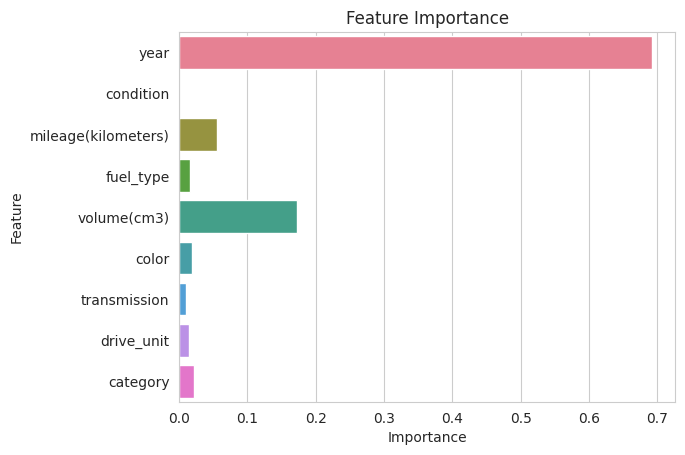

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
palette = sns.color_palette("husl", len(feature_df))
sns.set_style('whitegrid')
sns.barplot(x='Importance', y= 'Feature', data=feature_df, palette = palette, legend = False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# CONCLUSION
The goal of this project was to predict car prices in Belarus by analyzing various car features, including brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. Through exploratory data analysis, it was observed that car prices in Belarus have significantly increased since 2000. Cars running on petrol with automatic transmissions are priced higher compared to diesel cars with manual transmissions. Electric cars, however, are notably more expensive than other types. Among the different drive units, cars with all-wheel drive have the highest prices. Specialty segment cars are the most expensive, followed by luxury European, American, and Asian car segments.

A decision tree regressor model was utilized to predict car prices, achieving an accuracy of 89.43%. The most influential features for predicting car prices were identified as the year of manufacture and engine volume.